# Binomial Distribution #

**Objective:** Development of the Binomial Distribution Analysis to understand how I can calculate and plot it using Python's libraries.</p> 
**Source**: https://www.kaggle.com/datasets/lmackerman/practice-binomial-data

**Objetivo**: Desenvolver uma análise utilizando Distribuição Binomial para entender como posso cálcular e plotar gráficos utilizando Python.</p>
**Fonte**:https://www.kaggle.com/datasets/lmackerman/practice-binomial-data

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom

In [24]:
# set fig size
plt.rcParams["figure.figsize"] = (15,5) 

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,experiment,subject,item,condition,selection,selectCode
0,first,1,1,Baseline,Option 2,0
1,first,1,2,Baseline,Option 1,1
2,first,1,3,Baseline,Option 2,0
3,first,1,4,Baseline,Option 2,0
4,first,1,5,Baseline,Option 1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   experiment  1440 non-null   object
 1   subject     1440 non-null   int64 
 2   item        1440 non-null   int64 
 3   condition   1440 non-null   object
 4   selection   1440 non-null   object
 5   selectCode  1440 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 67.6+ KB


In [5]:
for i, r in data.items():
    print(i,data[i].unique())
    

experiment ['first' 'second' 'third']
subject [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
item [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
condition ['Baseline' 'Treatment']
selection ['Option 2' 'Option 1']
selectCode [0 1]


In [11]:
#analysis first_baseline
first_baseline = data.loc[(data['experiment']=='first')&(data['condition']=='Baseline')]

In [7]:
first_baseline.head()

,experiment,subject,item,condition,selection,selectCode
0,first,1,1,Baseline,Option 2,0
1,first,1,2,Baseline,Option 1,1
2,first,1,3,Baseline,Option 2,0
3,first,1,4,Baseline,Option 2,0
4,first,1,5,Baseline,Option 1,1


In [51]:
#all probability calculus Fist Baseline Item 1
prob_firstBaseline=pd.DataFrame(first_baseline.groupby(['item','selection'])['selectCode'].count()/20).reset_index(
).rename(columns={'selectCode':'probability'})

prob_firstBaseline.head()

,item,selection,probability
0,1,Option 1,0.70
1,1,Option 2,0.30
2,2,Option 1,0.60
3,2,Option 2,0.40
4,3,Option 1,0.55


Success for item 1 is Option2. 

We would like to determine the probability of 25 out of 60 people choosing 'Option2', when asked about their choice for item 1.

In [17]:
n = 60
x = 25
p = 0.30 #I am using this number according the data whe have in dataset

In [16]:
prob_first1 = binom.pmf(x,n,p)
prob_first1

0.016663233907264444

In [50]:
#all probability calculus Fist Treatment Item 1
first_treatment = data.loc[(data['experiment']=='first')&(data['condition']=='Treatment')]

prob_firstTreatment=pd.DataFrame(first_treatment.groupby(['item','selection'])['selectCode'].count()/20).reset_index(
).rename(columns={'selectCode':'probability'})
prob_firstTreatment.head()

,item,selection,probability
0,13,Option 1,0.95
1,13,Option 2,0.05
2,14,Option 1,0.70
3,14,Option 2,0.30
4,15,Option 1,0.75


In [30]:
n = 60
x = 25
p = 0.05 #I am using this number according the data whe have in dataset

In [37]:
prob_treatment1 = binom.pmf(x,n,p)
np.round(prob_treatment1,17)

3e-17

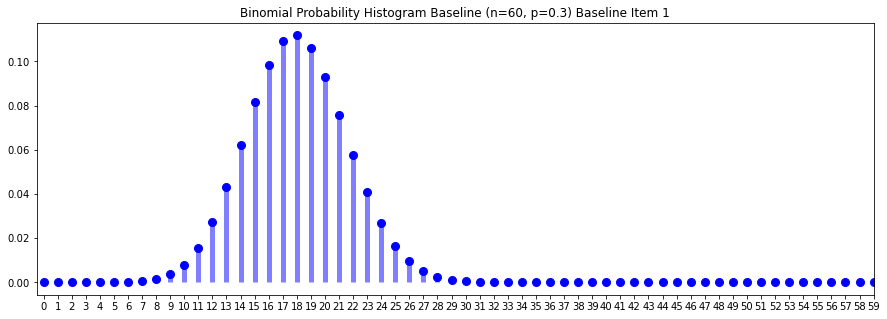

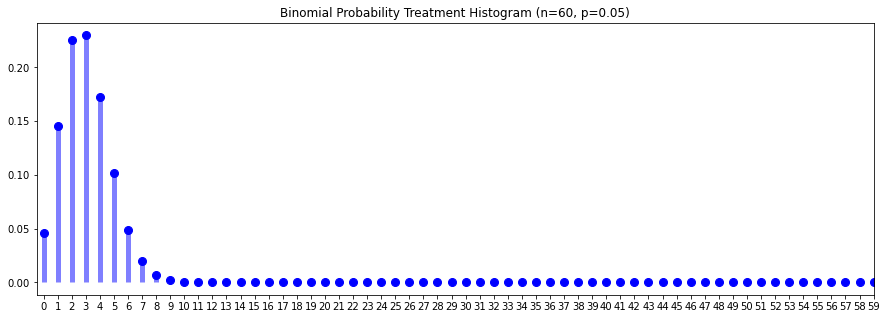

In [49]:
n1 =60
p1 = 0.3
x1 = np.arange(0,60)

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x1, n1, p1), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x1, n1, p1), colors='b', lw=5, alpha=0.5)
plt.xlim([-0.5,21])
plt.xticks(x)
plt.title("Binomial Probability Histogram Baseline (n=60, p=0.3) Baseline Item 1")
plt.show()


n2 =60
p2 = 0.05
x2 = np.arange(0,60)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x2, n2, p2), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x2, n2, p2), colors='b', lw=5, alpha=0.5)
plt.xlim([-0.5,21])
plt.xticks(x)
plt.title("Binomial Probability Treatment Histogram (n=60, p=0.05)")
plt.show()

From the histogram above, we can observe that the Treatment Histogram has fewer success events compared to the previous one. This kind of analysis could be used to help business areas make decisions, such as implementing or not implementing a button on the website. The interpretation of the information above will depend on the business context. 

Obsevando o histogram acima, notamos que o Histograma referente ao Tratamento tem menos eventos de sucesso, quando comparamos com o anterior.Este tipo de análise pode ser utilizado para ajudar diferentes áreas de negócio a tomarem suas decisões, como por exemplo na implementação ou não de um botão em um website. A interpretação dos gráficos acima dependerá do contexto do negócio

**Analysis**
By analyzing these plots, it appears that the IT team made a change to a button on the website with the objective of increasing the number of clicks. However, after the change, the probability of clicks seems to be lower than before. When we examine the distribution, it becomes evident that the change has not been beneficial for the business

**Análise**: analisando os plots notamos que a mudança realizada pelo time de TI no posicionamento do botão em dado website não aumentou o número de cliques e por isso não beneficiou o negócio 